In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)

In [4]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
df += np.random.normal(0,0.02,df.shape)
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 4 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
n_features = 1
n_seq = 2
n_steps = 2
x_train = x_train.reshape((x_train.shape[0], n_seq, 1, n_steps, n_features))
x_test = x_test.reshape((x_test.shape[0], n_seq, 1, n_steps, n_features))

In [6]:
model = keras.Sequential()
model.add(keras.layers.ConvLSTM2D(filters=512, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=1000,validation_data=(x_test,y_test),batch_size=32,verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 512)         2103296   
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 2,103,809
Trainable params: 2,103,809
Non-trainable params: 0
_________________________________________________________________
Train on 230 samples, validate on 54 samples
Epoch 1/1000
 - 3s - loss: 0.0328 - mse: 0.0328 - val_loss: 0.3572 - val_mse: 0.3572
Epoch 2/1000
 - 0s - loss: 0.0191 - mse: 0.0191 - val_loss: 0.1824 - val_mse: 0.1824
Epoch 3/1000
 - 0s - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 4/1000
 - 0s - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0170 - val_m

Epoch 86/1000
 - 0s - loss: 7.6336e-04 - mse: 7.6336e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 87/1000
 - 0s - loss: 7.5187e-04 - mse: 7.5187e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 88/1000
 - 0s - loss: 8.1531e-04 - mse: 8.1531e-04 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 89/1000
 - 0s - loss: 7.8479e-04 - mse: 7.8479e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 90/1000
 - 0s - loss: 7.7638e-04 - mse: 7.7638e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 91/1000
 - 0s - loss: 7.9862e-04 - mse: 7.9862e-04 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 92/1000
 - 0s - loss: 8.0234e-04 - mse: 8.0234e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 93/1000
 - 0s - loss: 7.3773e-04 - mse: 7.3773e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 94/1000
 - 0s - loss: 7.4242e-04 - mse: 7.4242e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 95/1000
 - 0s - loss: 8.7854e-04 - mse: 8.7854e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 96/1000
 - 0s - loss: 8.9352e-04 - mse: 8.9352e-04 - v

Epoch 173/1000
 - 0s - loss: 6.4347e-04 - mse: 6.4347e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 174/1000
 - 0s - loss: 8.6482e-04 - mse: 8.6482e-04 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 175/1000
 - 0s - loss: 8.5371e-04 - mse: 8.5371e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 176/1000
 - 0s - loss: 7.9238e-04 - mse: 7.9238e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 177/1000
 - 0s - loss: 6.9207e-04 - mse: 6.9207e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 178/1000
 - 0s - loss: 6.3779e-04 - mse: 6.3779e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 179/1000
 - 0s - loss: 6.3533e-04 - mse: 6.3533e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 180/1000
 - 0s - loss: 6.4668e-04 - mse: 6.4668e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 181/1000
 - 0s - loss: 6.3209e-04 - mse: 6.3209e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 182/1000
 - 0s - loss: 6.0455e-04 - mse: 6.0455e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 183/1000
 - 0s - loss: 6.6754e-04 - mse: 6.6

Epoch 260/1000
 - 0s - loss: 6.1500e-04 - mse: 6.1500e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 261/1000
 - 0s - loss: 5.8890e-04 - mse: 5.8890e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 262/1000
 - 0s - loss: 5.9708e-04 - mse: 5.9708e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 263/1000
 - 0s - loss: 6.1436e-04 - mse: 6.1436e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 264/1000
 - 0s - loss: 6.0191e-04 - mse: 6.0191e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 265/1000
 - 0s - loss: 6.7420e-04 - mse: 6.7420e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 266/1000
 - 0s - loss: 5.8991e-04 - mse: 5.8991e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 267/1000
 - 0s - loss: 5.8503e-04 - mse: 5.8503e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 268/1000
 - 0s - loss: 5.6779e-04 - mse: 5.6779e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 269/1000
 - 0s - loss: 5.8922e-04 - mse: 5.8922e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 270/1000
 - 0s - loss: 5.8773e-04 - mse: 5.8

Epoch 347/1000
 - 0s - loss: 8.2643e-04 - mse: 8.2643e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 348/1000
 - 0s - loss: 6.9897e-04 - mse: 6.9897e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 349/1000
 - 0s - loss: 6.7218e-04 - mse: 6.7218e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 350/1000
 - 0s - loss: 5.6264e-04 - mse: 5.6264e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 351/1000
 - 0s - loss: 5.8414e-04 - mse: 5.8414e-04 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 352/1000
 - 0s - loss: 5.7718e-04 - mse: 5.7718e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 353/1000
 - 0s - loss: 5.9186e-04 - mse: 5.9186e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 354/1000
 - 0s - loss: 5.6348e-04 - mse: 5.6348e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 355/1000
 - 0s - loss: 5.5099e-04 - mse: 5.5099e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 356/1000
 - 0s - loss: 6.0594e-04 - mse: 6.0594e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 357/1000
 - 0s - loss: 5.8465e-04 - mse: 5.8

Epoch 434/1000
 - 0s - loss: 5.7068e-04 - mse: 5.7068e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 435/1000
 - 0s - loss: 5.5184e-04 - mse: 5.5184e-04 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 436/1000
 - 0s - loss: 5.4780e-04 - mse: 5.4780e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 437/1000
 - 0s - loss: 5.5208e-04 - mse: 5.5208e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 438/1000
 - 0s - loss: 5.4527e-04 - mse: 5.4527e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 439/1000
 - 0s - loss: 5.9101e-04 - mse: 5.9101e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 440/1000
 - 0s - loss: 5.9140e-04 - mse: 5.9140e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 441/1000
 - 0s - loss: 6.2675e-04 - mse: 6.2675e-04 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 442/1000
 - 0s - loss: 5.8252e-04 - mse: 5.8252e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 443/1000
 - 0s - loss: 5.7505e-04 - mse: 5.7505e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 444/1000
 - 0s - loss: 5.5183e-04 - mse: 5.5

Epoch 521/1000
 - 0s - loss: 5.4818e-04 - mse: 5.4818e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 522/1000
 - 0s - loss: 5.3086e-04 - mse: 5.3086e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 523/1000
 - 0s - loss: 5.4072e-04 - mse: 5.4072e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 524/1000
 - 0s - loss: 5.4183e-04 - mse: 5.4183e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 525/1000
 - 0s - loss: 5.5469e-04 - mse: 5.5469e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 526/1000
 - 0s - loss: 5.5320e-04 - mse: 5.5320e-04 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 527/1000
 - 0s - loss: 6.1213e-04 - mse: 6.1213e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 528/1000
 - 0s - loss: 5.5533e-04 - mse: 5.5533e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 529/1000
 - 0s - loss: 5.5797e-04 - mse: 5.5797e-04 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 530/1000
 - 0s - loss: 6.1669e-04 - mse: 6.1669e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 531/1000
 - 0s - loss: 6.3434e-04 - mse: 6.3

Epoch 608/1000
 - 0s - loss: 5.5864e-04 - mse: 5.5864e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 609/1000
 - 0s - loss: 6.4942e-04 - mse: 6.4942e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 610/1000
 - 0s - loss: 5.6782e-04 - mse: 5.6782e-04 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 611/1000
 - 0s - loss: 5.8000e-04 - mse: 5.8000e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 612/1000
 - 0s - loss: 5.3469e-04 - mse: 5.3469e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 613/1000
 - 0s - loss: 5.4229e-04 - mse: 5.4229e-04 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 614/1000
 - 0s - loss: 5.4945e-04 - mse: 5.4945e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 615/1000
 - 0s - loss: 5.1400e-04 - mse: 5.1400e-04 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 616/1000
 - 0s - loss: 5.9346e-04 - mse: 5.9346e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 617/1000
 - 0s - loss: 6.3030e-04 - mse: 6.3030e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 618/1000
 - 0s - loss: 6.6440e-04 - mse: 6.6

Epoch 695/1000
 - 0s - loss: 5.1725e-04 - mse: 5.1725e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 696/1000
 - 0s - loss: 5.4221e-04 - mse: 5.4221e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 697/1000
 - 0s - loss: 5.4322e-04 - mse: 5.4322e-04 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 698/1000
 - 0s - loss: 5.7175e-04 - mse: 5.7175e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 699/1000
 - 0s - loss: 5.9685e-04 - mse: 5.9685e-04 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 700/1000
 - 0s - loss: 5.8120e-04 - mse: 5.8120e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 701/1000
 - 0s - loss: 5.1280e-04 - mse: 5.1280e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 702/1000
 - 0s - loss: 5.3952e-04 - mse: 5.3952e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 703/1000
 - 0s - loss: 5.8225e-04 - mse: 5.8225e-04 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 704/1000
 - 0s - loss: 5.5073e-04 - mse: 5.5073e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 705/1000
 - 0s - loss: 5.2919e-04 - mse: 5.2

Epoch 782/1000
 - 0s - loss: 5.1835e-04 - mse: 5.1835e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 783/1000
 - 0s - loss: 4.9477e-04 - mse: 4.9477e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 784/1000
 - 0s - loss: 5.5089e-04 - mse: 5.5089e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 785/1000
 - 0s - loss: 5.4460e-04 - mse: 5.4460e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 786/1000
 - 0s - loss: 5.4187e-04 - mse: 5.4187e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 787/1000
 - 0s - loss: 6.3442e-04 - mse: 6.3442e-04 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 788/1000
 - 0s - loss: 5.9234e-04 - mse: 5.9234e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 789/1000
 - 0s - loss: 6.0750e-04 - mse: 6.0750e-04 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 790/1000
 - 0s - loss: 5.1963e-04 - mse: 5.1963e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 791/1000
 - 0s - loss: 5.4530e-04 - mse: 5.4530e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 792/1000
 - 0s - loss: 6.3807e-04 - mse: 6.3

Epoch 869/1000
 - 0s - loss: 5.1775e-04 - mse: 5.1775e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 870/1000
 - 0s - loss: 5.2225e-04 - mse: 5.2225e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 871/1000
 - 0s - loss: 5.0621e-04 - mse: 5.0621e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 872/1000
 - 0s - loss: 5.0237e-04 - mse: 5.0237e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 873/1000
 - 0s - loss: 5.0092e-04 - mse: 5.0092e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 874/1000
 - 0s - loss: 5.6492e-04 - mse: 5.6492e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 875/1000
 - 0s - loss: 5.4104e-04 - mse: 5.4104e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 876/1000
 - 0s - loss: 5.5109e-04 - mse: 5.5109e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 877/1000
 - 0s - loss: 5.0713e-04 - mse: 5.0713e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 878/1000
 - 0s - loss: 5.3795e-04 - mse: 5.3795e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 879/1000
 - 0s - loss: 5.2090e-04 - mse: 5.2

Epoch 956/1000
 - 0s - loss: 6.4245e-04 - mse: 6.4245e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 957/1000
 - 0s - loss: 4.9502e-04 - mse: 4.9502e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 958/1000
 - 0s - loss: 5.2738e-04 - mse: 5.2738e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 959/1000
 - 0s - loss: 4.9186e-04 - mse: 4.9186e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 960/1000
 - 0s - loss: 5.3243e-04 - mse: 5.3243e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 961/1000
 - 0s - loss: 5.1631e-04 - mse: 5.1631e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 962/1000
 - 0s - loss: 4.9165e-04 - mse: 4.9165e-04 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 963/1000
 - 0s - loss: 5.4194e-04 - mse: 5.4194e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 964/1000
 - 0s - loss: 6.2880e-04 - mse: 6.2880e-04 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 965/1000
 - 0s - loss: 5.7346e-04 - mse: 5.7346e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 966/1000
 - 0s - loss: 5.9146e-04 - mse: 5.9

In [7]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [8]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [9]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict)))
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 109.77500280411232
test mse squared: 404.9664135369806


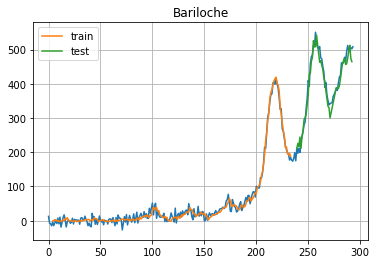

In [10]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

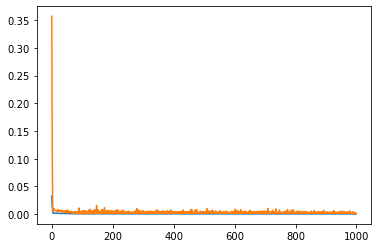

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [12]:
n = len(test_data)
n_steps = 2
x_input=test_data[n-lag:].reshape(1,-1)
x_input = x_input.flatten()
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.91401124]]


In [13]:
scaler.inverse_transform(yhat)

array([[486.19104]], dtype=float32)

In [14]:
df1[-20:]

array([[528.26685721],
       [539.87040667],
       [545.97753797],
       [550.25252988],
       [553.91680866],
       [555.74894805],
       [566.13107125],
       [582.62032575],
       [579.56676011],
       [589.33817018],
       [597.888154  ],
       [586.28460453],
       [582.62032575],
       [567.96321064],
       [544.14539858],
       [517.27402087],
       [488.57050378],
       [458.03484729],
       [421.39205951],
       [379.86356669]])